---
title: "UNICEF Assignment"
subtitle: "Connecting the world:The Global State of Mobile Access"
author: "Sindhiya Ravi - DCU ID: A00010410"
date: "April 27, 2025"
format:
  html:
    theme: materia
    toc: true
    toc-depth: 3
    toc-location: right
    number-sections: true
    code-fold: true
    code-tools: true
    code-summary: "Show Code"
    allow-html: true
    css: styles.css
embed-resources: true
---

  

In [1]:
#| echo: false
#| output: false
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


<hr>
<p align="center">
  <img src="/content/drive/MyDrive/Colab Notebooks/UNICEF_Logo-1.png" alt="UNICEF Logo" width="200">
</p>
<hr>

## 📜Introduction {.unnumbered}


<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
Mobile connectivity has become an essential pillar of modern development — enabling individuals to access opportunities, information, and services that shape their well-being and participation in society. For UNICEF, mobile access is not just about technology, but about inclusion, equity, and the right to participate fully in the digital age. As global priorities shift toward sustainable and inclusive development, understanding who is connected — and who is left behind — becomes increasingly critical.
</p>
<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
This report explores the broader landscape of mobile phone ownership using recent UNICEF data. Through a series of data-driven visual narratives, it seeks to uncover the underlying factors that influence digital access across countries. Rather than presenting generalised assumptions, the report invites reflection on how socioeconomic, policy, and systemic dimensions shape mobile connectivity — and why addressing these disparities is key to advancing UNICEF’s mission for every child and community.
</p>

In [2]:
#| echo: false
#| output: false
!pip install plotnine geopandas


## 🌍 Who’s Connected? The State of Mobile Connectivity Across the World{.unnumbered}


<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
 Access to mobile technology plays a vital role in connecting people to the digital world but that access isn’t evenly distributed. The following map provides a snapshot of mobile phone ownership across countries, setting the foundation for deeper analysis. By highlighting regional disparities, it helps identify where digital inclusion efforts are most urgently needed.
</p>

In [3]:
#| code-fold: true
#| code-summary: "Show code"
import pandas as pd
import geopandas as gp
from plotnine import *



In [13]:
#| code-fold: true
#| code-summary: "Show code"
shape_world = gp.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")


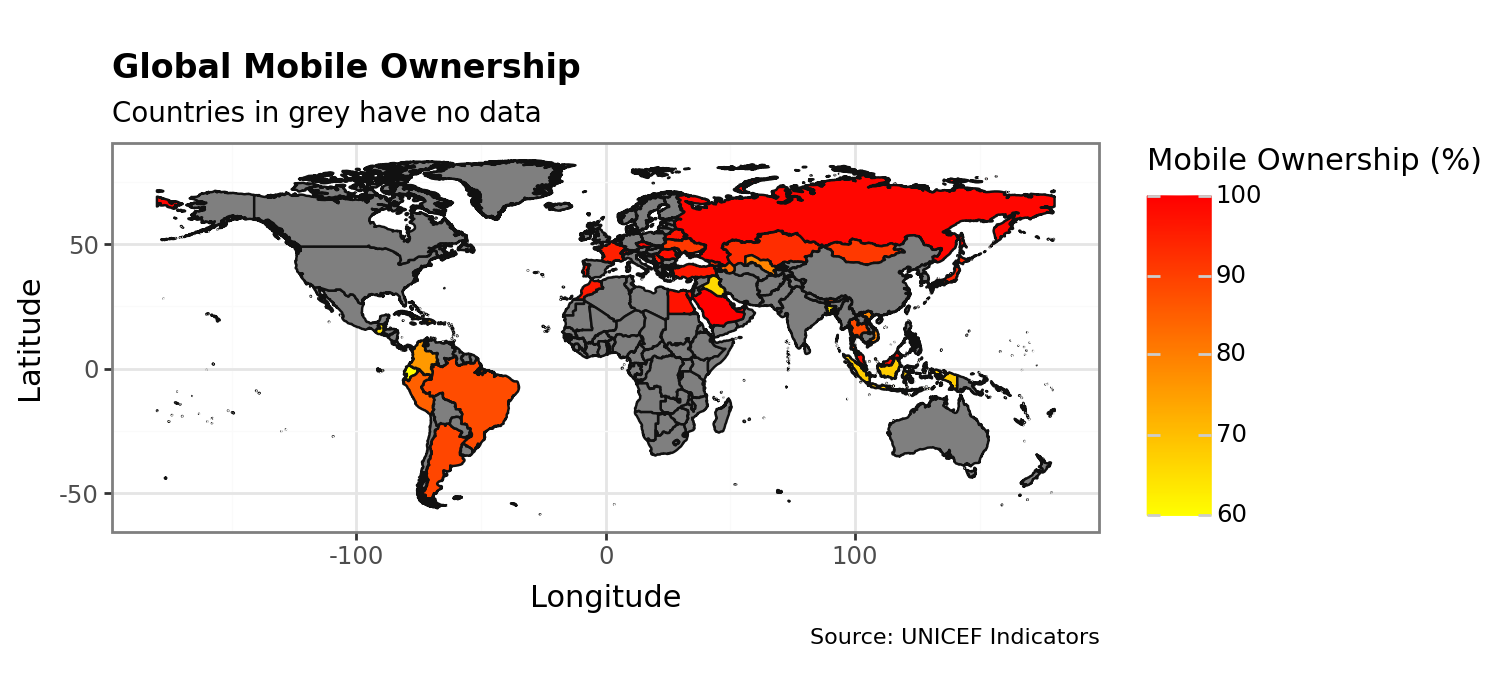

In [5]:
#| code-fold: true
#| code-summary: "Show code"

unicef = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/unicef_indicator_2.csv")
unicef_total = unicef[unicef["sex"] == "Total"]

#Sorting the years in ascending order,and selecting last 3 years
latest_years = sorted(unicef_total["time_period"].unique())[-3:]

recent_data = unicef_total[unicef_total["time_period"].isin(latest_years)]

latest = (
    recent_data
    .sort_values("time_period")
    .drop_duplicates("country", keep="last")
    .rename(columns={"country": "Country", "obs_value": "Mobile_Ownership"})
)

merged_data = shape_world.merge(latest, left_on="name", right_on="Country", how="left")

(
    ggplot(data=merged_data)
    + aes(fill="Mobile_Ownership")
    + geom_map()
    + scale_fill_gradient(low="yellow", high="red")
    + labs(
        title = "Global Mobile Ownership",
        subtitle="Countries in grey have no data",
        caption="Source: UNICEF Indicators",
        x="Longitude",
        y="Latitude",
        fill="Mobile Ownership (%)"
    )
    + coord_fixed()
    + theme_bw()
    + theme(
        figure_size=(7.5, 3.5),
        plot_subtitle=element_text(size=10),
        plot_title=element_text(size=12, face="bold"),
        plot_caption=element_text(size=8)
    )
)



<h3 style="margin-top: 0; font-family: Georgia; font-size: 20px;">Which countries are more connected?</h3>
<div style="background-color: #e7f3fc; border-left: 5px solid #0077b6; padding: 16px; font-family: Georgia; font-size: 18px; text-align: justify; border-radius: 8px;">

There is a significant global divide in mobile phone access. This map illustrates global mobile phone ownership based on data from the latest three years (2021–2023). While most developed countries—such as parts of the Americas<strong>  (e.g., Argentina, Brazil) </strong>, Europe<strong>  (e.g., Switzerland, France) </strong>, Asia <strong> (e.g., Singapore, Malaysia, South Korea) </strong>, and several Middle Eastern nations—have ownership rates above <strong> 80–90%</strong>, some lower-income countries like <strong> Bangladesh </strong> show rates around 64%, while <strong> Ecuador </strong> has an ownership rate of just 59%. These disparities in digital access reveal an ongoing global divide—where the ability to connect remains out of reach for many.

For UNICEF, mobile connectivity is a powerful tool to reach the most vulnerable populations. It supports education, emergency response, digital services, and inclusive development. Ensuring equal access to mobile technology aligns with UNICEF’s mission to uphold every child’s right to participate in and benefit from the digital world.

</div>




## Bridging the Mobile Gap: 🚹 Male vs. 🚺 Female Ownership {.unnumbered}


<div style="background: linear-gradient(90deg, #e0f7fa, #fce4ec); padding: 15px; border-radius: 8px; text-align: justify; font-family: Georgia; font-size: 18px;">

  Mobile phones are vital tools for participation in the digital world — from learning and communication to financial access. Before we dive into UNICEF’s ongoing concern for equitable digital access, this chart sets the stage by showing how mobile phone ownership varies between men and women across countries with the highest male ownership rates. It helps reveal where progress has been made and where gaps still persist.
  
</div>

<p align="center">
  <img src="/content/drive/MyDrive/Colab Notebooks/gender.png" alt="gender Logo" width="300">
</p>

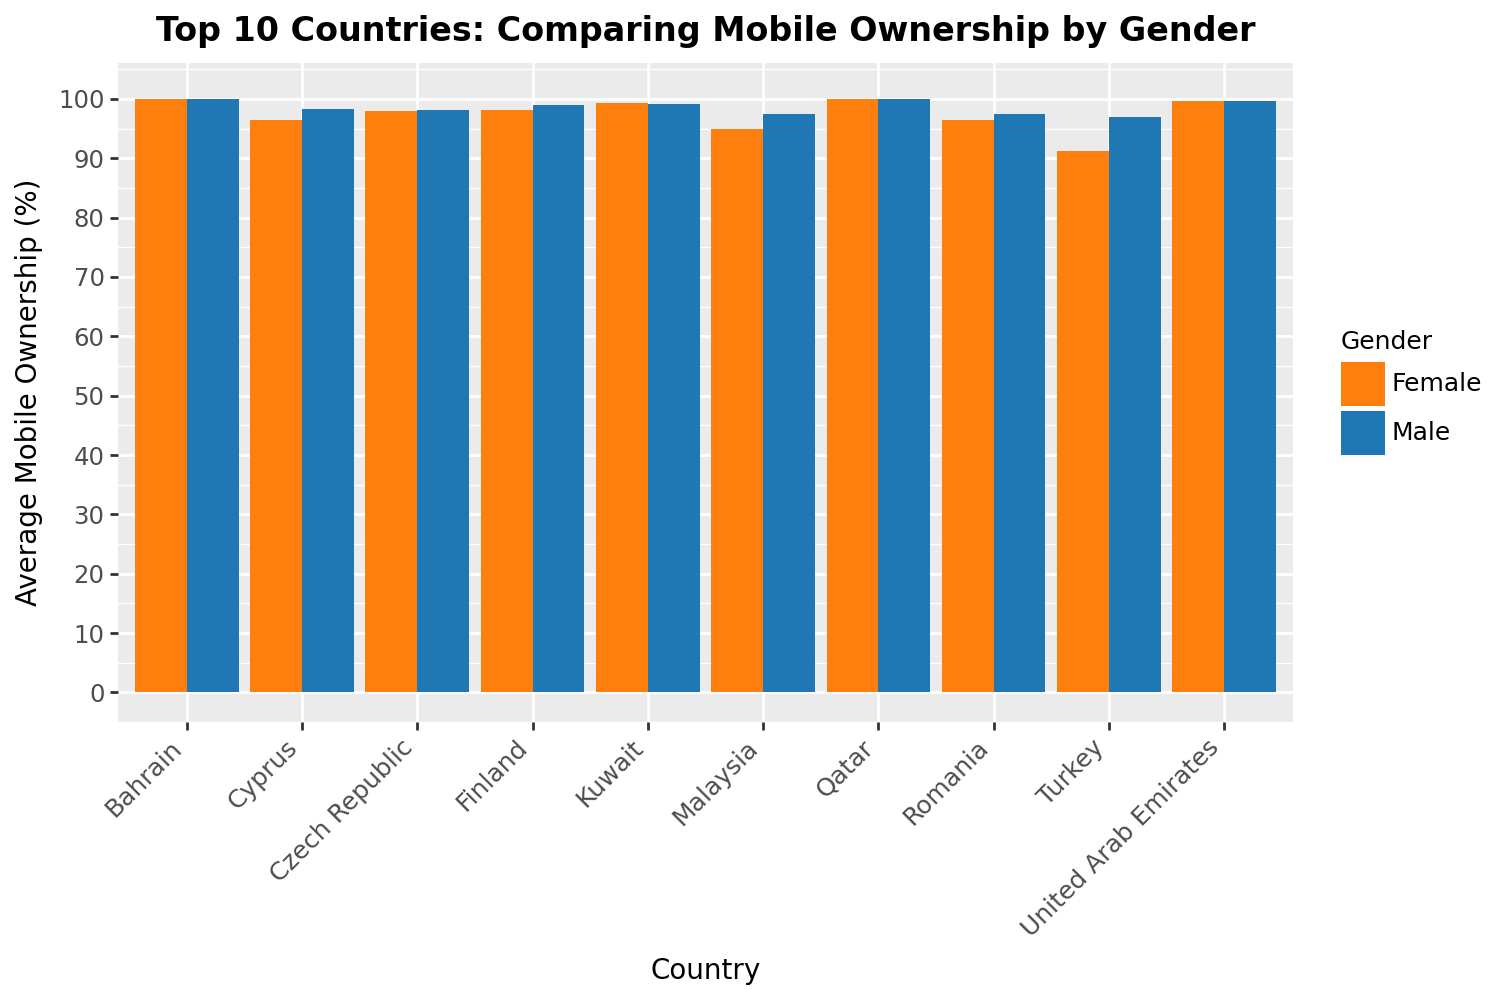

In [12]:
#| code-fold: true
#| code-summary: "Show code"

import polars as pl
from plotnine import ggplot, aes, geom_col, labs, theme, element_text, scale_fill_manual, scale_y_continuous

uni_data = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/unicef_indicator_2.csv")

# Filtering by indicator and sex, then grouping by country and sex and calculating Avg mobile Ownership
ownership_gender = (
    uni_data
    .filter(
        (pl.col("indicator") == "Proportion of individuals who own a mobile telephone") &
        (pl.col("sex").is_in(["Male", "Female"]))
    )
    .group_by(["country", "sex"])
    .agg(pl.col("obs_value").mean().alias("avg_ownership"))
)

# getting top 10 countries by Male ownership
top_male_countries = (
    ownership_gender
    .filter(pl.col("sex") == "Male")
    .sort("avg_ownership", descending=True)
    .head(10)
    .select("country")
)

filtered = ownership_gender.filter(pl.col("country").is_in(top_male_countries["country"]))

#Converting to Pandas for plotnine
plot_unicef = filtered.to_pandas()


plot = (
    ggplot(plot_unicef, aes(x="country", y="avg_ownership", fill="sex"))
    + geom_col(position="dodge")
    + scale_y_continuous(
        limits=(0, 101),
        breaks=range(0, 101, 10)
    )
    + labs(
        title="Top 10 Countries: Comparing Mobile Ownership by Gender",
        x="Country",
        y="Average Mobile Ownership (%)",
        fill="Gender"
    )
    + scale_fill_manual(values={"Male": "#1f77b4", "Female": "#ff7f0e"})
    + theme(
        axis_text_x=element_text(rotation=45, ha="right", size=9, family="DejaVu Sans"),
        axis_title=element_text(size=10, family="DejaVu Sans"),
        plot_title=element_text(size=12, weight='bold', family="DejaVu Sans"),
        legend_title=element_text(size=9, family="DejaVu Sans"),
        legend_text=element_text(size=9, family="DejaVu Sans"),
        figure_size=(7.5, 5)
    )
)
display(plot)


<div style="background-color: #e7f3fc; border-left: 5px solid #0077b6; padding: 16px; font-family: Georgia; font-size: 18px; text-align: justify; border-radius: 8px;">

This bar chart illustrates <strong>UNICEF’s ongoing concern for equitable digital access</strong>, highlighting mobile ownership rates by gender in the top 10 countries with the highest male ownership.

While nations such as <strong>Qatar</strong>, <strong>United Arab Emirates</strong>, and <strong>Bahrain</strong> boast nearly universal access to mobile phones for both men and women, a persistent gender gap is visible in others — notably in <strong>Malaysia</strong> and <strong>Turkey</strong>, where fewer women own phones compared to men, even though most people in the country have phones.

This gap reflects broader structural inequalities that UNICEF seeks to address through its commitment to <strong>gender equality</strong> and <strong>digital inclusion</strong>. Mobile phones are not just tools of communication — they are gateways to <em>education, economic participation, healthcare,</em> and <em>emergency response</em>.
</div>

## 📱 Stability in Connection: Mobile Ownership Amid Inflation {.unnumbered}

/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


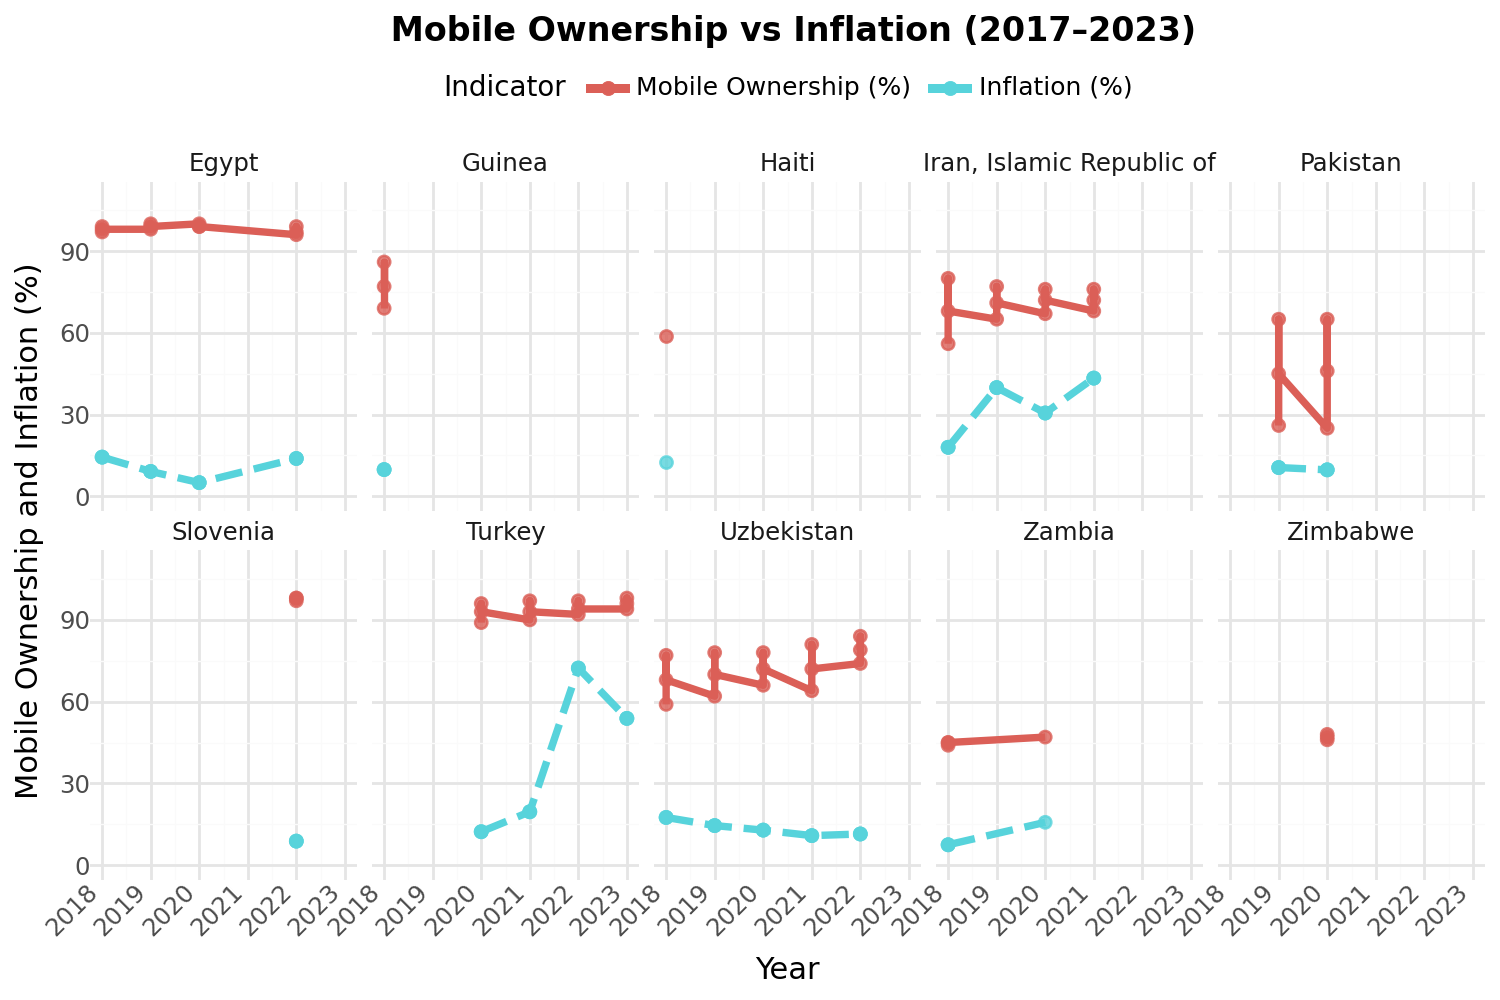

In [ ]:
#| code-fold: true
#| code-summary: "Show code"
#| warning: false
#| message: false

import polars as pl
import pandas as pd
from plotnine import *

df = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/unicef_indicator_2.csv")
#Filtering the countries from 2018 to 2023
filtered = (
    df.filter(
        (pl.col("time_period") >= 2018) & (pl.col("time_period") <= 2023) &
        pl.col("obs_value").is_not_null() &
        pl.col("Inflation, consumer prices (annual %)").is_not_null()
    )
    .select([
        pl.col("country"),
        pl.col("time_period").alias("Year"),
        pl.col("obs_value").alias("Mobile_Ownership"),
        pl.col("Inflation, consumer prices (annual %)").alias("Inflation")
    ])
)

#grouping by country and calculation Avg Inflation and Avg Mobile ownership and selecting the top 10 countries
avg_stats = (
    filtered
    .group_by("country")
    .agg([
        pl.col("Inflation").mean().alias("Avg_Inflation"),
        pl.col("Mobile_Ownership").mean().alias("Avg_Mobile_Ownership")
    ])
    .sort("Avg_Inflation", descending=True)
    .head(10)
)


top_countries = avg_stats["country"].to_list()
filtered_top = filtered.filter(pl.col("country").is_in(top_countries))


plot_df = filtered_top.to_pandas()


plot = (
    ggplot(plot_df, aes(x="Year")) +
    geom_line(aes(y="Mobile_Ownership", color="'Mobile Ownership (%)'"), size=1.5) +
    geom_point(aes(y="Mobile_Ownership", color="'Mobile Ownership (%)'"), size=2, shape='o', alpha=0.8) +
    geom_line(aes(y="Inflation", color="'Inflation (%)'"), linetype='dashed', size=1.5) +
    geom_point(aes(y="Inflation", color="'Inflation (%)'"), size=2, shape='o', alpha=0.8) +
    facet_wrap("country", nrow=2) +
    scale_y_continuous(limits=(0, 110)) +
    labs(
        title=" Mobile Ownership vs Inflation (2017–2023)",
        x="Year",
        y="Mobile Ownership and Inflation (%)",
        color="Indicator"
    ) +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=45, ha="right"),
        legend_title=element_text(size=10, family="DejaVu Sans"),
        legend_text=element_text(size=9, family="DejaVu Sans"),
        plot_title=element_text(size=12, weight='bold', family="DejaVu Sans"),
        figure_size=(7.5, 5),
        legend_position="top"
    )
)

display(plot)


In [ ]:
#| echo: false
#| output: false
# Display the avg of inflation and Mobile ownership
print(avg_stats)

shape: (10, 3)
┌───────────────────────────┬───────────────┬──────────────────────┐
│ country                   ┆ Avg_Inflation ┆ Avg_Mobile_Ownership │
│ ---                       ┆ ---           ┆ ---                  │
│ str                       ┆ f64           ┆ f64                  │
╞═══════════════════════════╪═══════════════╪══════════════════════╡
│ Zimbabwe                  ┆ 557.2         ┆ 47.0                 │
│ Turkey                    ┆ 39.5125       ┆ 94.083333            │
│ Iran, Islamic Republic of ┆ 32.975        ┆ 70.666667            │
│ Uzbekistan                ┆ 13.444        ┆ 72.266667            │
│ Haiti                     ┆ 12.48         ┆ 59.0                 │
│ Egypt                     ┆ 10.6225       ┆ 98.416667            │
│ Pakistan                  ┆ 10.16         ┆ 45.333333            │
│ Guinea                    ┆ 9.83          ┆ 77.333333            │
│ Zambia                    ┆ 9.55          ┆ 45.25                │
│ Slovenia         

<div style="background-color: #e7f3fc; border-left: 5px solid #0077b6; padding: 16px; font-family: Georgia; font-size: 18px; text-align: justify; border-radius: 8px;">

This chart shows how <strong> mobile phone ownership</strong> and <strong> inflation rates </strong> fluctuated over time from <strong> 2018 to 2023</strong>  in the above shown countries. It highlights how inflation levels rose and fell across different years—and how mobile ownership changed alongside them. This helps us explore whether economic shifts may have affected how easily people could access and afford mobile phones.

Some countries, like<strong> Egypt, Turkey, and Slovenia, </strong> had high  average mobile phone ownership (over <strong> 90%</strong>) even when inflation rate is fluctuated. This means people in those countries likely still had access to phones despite rising costs.

But in countries like <strong> Zambia</strong> and <strong> Pakistan</strong>, mobile ownership stayed low (around <strong> 45%</strong>), suggesting that when prices go up and money loses value, it becomes harder for people to afford mobile phones—especially in places where income is already low.
This shows that <strong> inflation doesn’t affect every country the same way</strong>, and having strong systems or support can help people stay connected even during tough times. For UNICEF, this highlights why it’s important to make digital access available for everyone, no matter what’s happening with the economy.
</div>


## 💰 Breaking the Wealth Barrier: Mobile Access Beyond GDP {.unnumbered}

<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
 Economic growth is often seen as a gateway to better digital access — but does a higher income always lead to higher mobile phone ownership?This section examines that assumption by comparing average GDP per capita with mobile ownership across countries. By visualizing these two indicators together, the scatter plot below challenges assumptions about wealth and connectivity, and sets the stage for deeper insight into the factors influencing global digital inclusion.
</p>

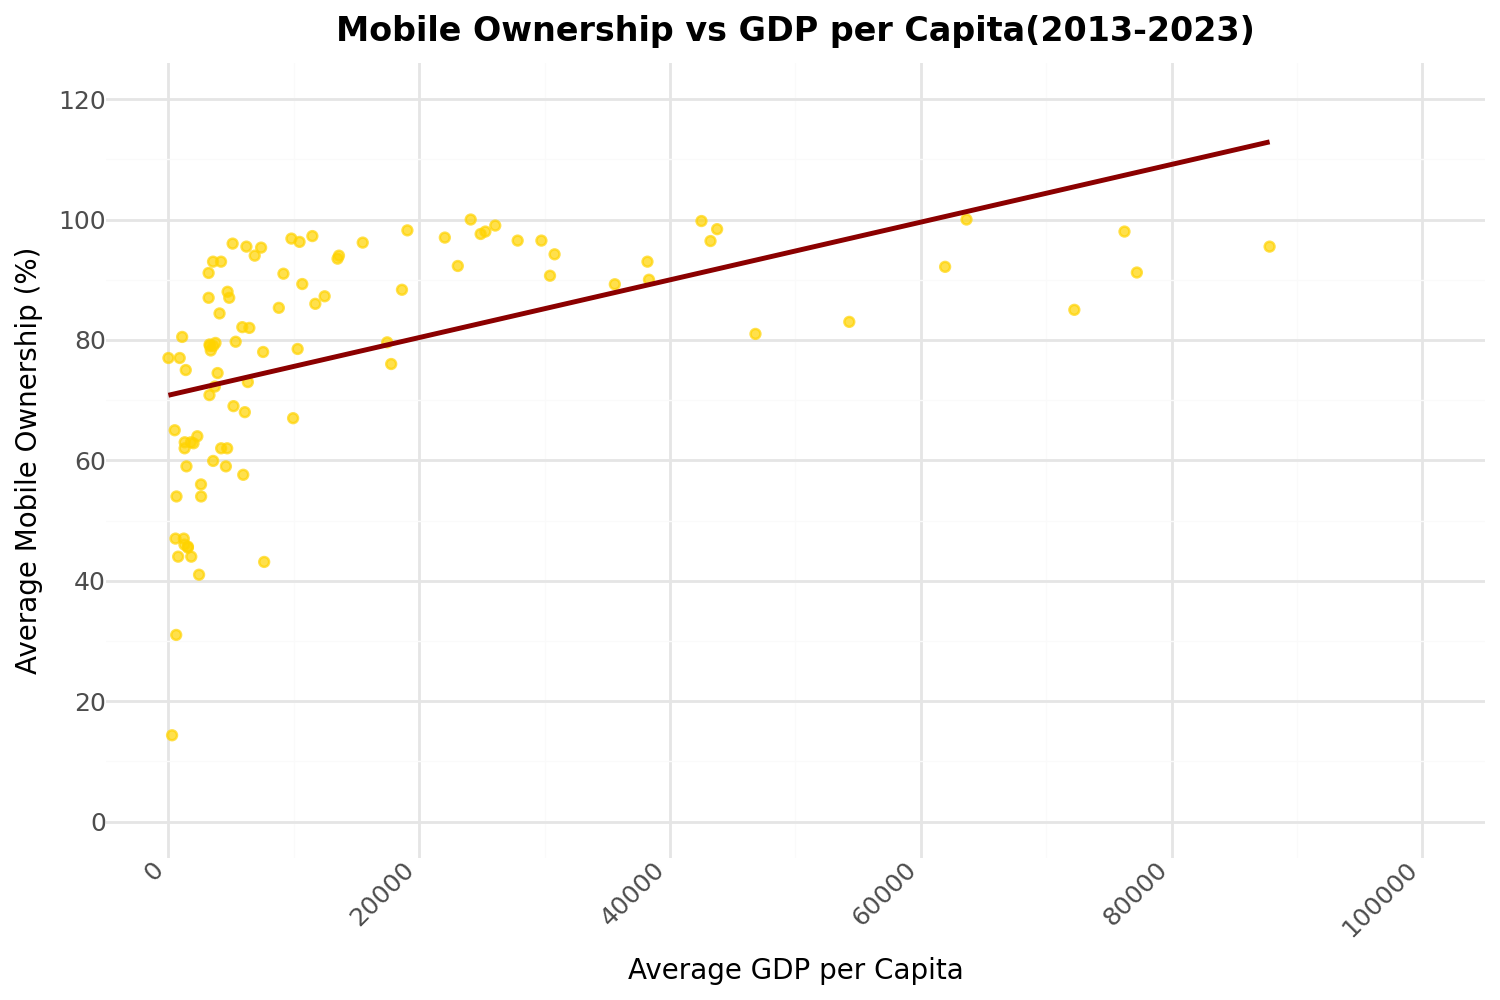

In [ ]:
#| code-fold: true
#| code-summary: "Show code"

df = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/unicef_indicator_2.csv")

# filtering and grouping by countries and calculation Avg mobile ownership and Avg GDP Per Capita
filtered = (
    df.filter(
        (pl.col("indicator") == "Proportion of individuals who own a mobile telephone") &
        (pl.col("sex") == "Total") &
        pl.col("GDP per capita (constant 2015 US$)").is_not_null() &
        pl.col("obs_value").is_not_null()
    )
    .group_by("country")
    .agg([
        pl.col("GDP per capita (constant 2015 US$)").mean().alias("Avg_GDP_per_capita"),
        pl.col("obs_value").mean().alias("Avg_Mobile_Ownership")
    ])
    .rename({"country": "Country"})
)

# Converting to pandas
plot_df = filtered.to_pandas()

plot = (
    ggplot(plot_df, aes(x="Avg_GDP_per_capita", y="Avg_Mobile_Ownership"))
    + geom_point(alpha=0.7, color="#FFD300")
    + geom_smooth(method="lm", se=False, color="darkred")
    + scale_x_continuous(limits=(0, 100000), breaks=range(0, 100001, 20000))
    + scale_y_continuous(limits=(0, 120), breaks=range(0, 121, 20))
    + labs(
        title="Mobile Ownership vs GDP per Capita(2013-2023)",
        x="Average GDP per Capita",
        y="Average Mobile Ownership (%)"
    )
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=45, ha="right", size=9, family="DejaVu Sans"),
        axis_text_y=element_text(size=9, family="DejaVu Sans"),
        axis_title=element_text(size=10, family="DejaVu Sans"),
        plot_title=element_text(size=12, weight='bold', family="DejaVu Sans"),
        figure_size=(7.5, 5)
    )
)

plot

<div style="background-color: #e7f3fc; border-left: 5px solid #0077b6; padding: 16px; font-family: Georgia; font-size: 18px; text-align: justify; border-radius: 8px;">

This scatter plot provides a visual perspective on how economic standing relates to digital connectivity across nations. By comparing <strong>average GDP per capita</strong> with <strong>average mobile phone ownership</strong> from <strong>2013 to 2023</strong>, the chart helps identify whether wealthier countries consistently support greater access to mobile technology.

The upward slope of the regression line suggests a general trend: countries with higher economic output tend to report higher mobile ownership rates. This indicates a positive correlation between national wealth and digital access.
However, the scattered distribution of countries around the line reveals that <strong>GDP alone does not fully determine connectivity</strong>. Some lower-income nations outperform expectations with relatively high ownership, while others underperform despite stronger economies.

This variation underscores the fact that while economic strength matters, it is not the only factor. Policy, affordability, infrastructure, and inclusive digital strategies are equally critical. For UNICEF, these findings reaffirm the need for targeted efforts to ensure that all communities—not just those with economic advantage—have access to mobile technology and its benefits.

</div>


## 🧠 Key Insights from the Report {.unnumbered}

<div style="display: flex; gap: 20px; font-family: Georgia; color: #003366;">
 <div style="width: 260px; min-height: 340px; padding: 15px; background: linear-gradient(180deg, #e0f7fa, #fce4ec); border-radius: 8px;">
  <h2 style="font-size: 19px;">📶 Mobile Ownership across genders</h2>
  <p style="font-size: 18px; text-align: justify;">Achieved in countries like <strong>Qatar, United Arab Emirates, and Bahrain, </strong> where both infrastructure and affordability support near-universal mobile ownership for men and women. </p>    
</div>
 <div style="width: 260px; min-height: 340px; padding: 15px; background: linear-gradient(180deg, #e0f7fa, #fce4ec); border-radius: 8px;">
  <h2 style="font-size: 19px;"> 📉 Mobile Access Resilience </h2>
  <p style="font-size: 18px; text-align: justify;">In countries like <strong>Egypt, Turkey, and Slovenia</strong>, mobile ownership remained high despite inflation—showing strong support systems. </p>   
</div>
 <div style="width: 260px; min-height: 340px; padding: 15px; background: linear-gradient(180deg, #e0f7fa, #fce4ec); border-radius: 8px;">
  <h2 style="font-size: 19px;"> 💸GDP Isn’t Enough for Connection </h2>
  <p style="font-size: 18px; text-align: justify;">higher national income doesn’t automatically lead to greater mobile connectivity. In many cases, countries with modest GDPs outperform wealthier ones in access, thanks to strong policies, affordability initiatives, and inclusive infrastructure. </p>   
</div>
</div>


## ✍️ Conclusion {.unnumbered}

<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
  Access to mobile phones is a vital part of digital inclusion — not just a convenience, but a necessity for participation in education, healthcare, employment, and civic life. This report has explored how mobile phone ownership varies across regions, genders, and economic conditions using multiple visualisations.
</p>
<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
  From global overviews to nuanced breakdowns by gender, inflation, and income level, one message is clear: equitable access to mobile technology cannot be explained by wealth alone. Policy, infrastructure, affordability, and targeted efforts are just as important as GDP.
</p>
<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
  For UNICEF, ensuring inclusive digital access means focusing not only on economic indicators, but also addressing the structural barriers that limit connectivity. This work is essential for leaving no one behind in the digital age.
</p>

## 💡 Recommendations for UNICEF {.unnumbered}

<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
 <strong>* Targeted Support in Low-Income Countries:</strong>  Strengthen mobile access through subsidies, local partnerships, and infrastructure support.
</p>
<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
 <strong>*Gender-Inclusive Strategies:</strong>Fund programs that directly address the digital gender divide — especially in regions where cultural barriers remain strong.
</p>
<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
 <strong>*Monitor Inflation Vulnerability:</strong>In countries facing high inflation, ensure emergency mobile connectivity efforts are part of the response.
</p>
<p style="font-family: Georgia; text-align: justify; font-size: 18px; color: #003366;">
 <strong>*Encourage Local Innovation:</strong>Promote community-based, low-cost connectivity solutions in countries lagging behind in GDP but with high ownership potential.
</p>